In [9]:
import alpaca_trade_api as alpaca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import hvplot.pandas

# Replace YOUR_API_KEY and YOUR_API_SECRET with your Alpaca API key and secret
alpaca_api = alpaca.REST('PKX4ZIXWV9HTG4JDDTMQ', 'BNb47rETbt7rJwuJxjJb42b3QtIr52TyhESHfogr', api_version='v2')

# Set the ticker symbol and time frame ( XLK - Info Tech )
ticker = "XLB"
timeframe = "60Min"

# Set the start and end dates for the data
start_date = "2008-01-01T00:00:00-00:00"
end_date = "2022-12-31T00:00:00-00:00"

# Retrieve the data
data = alpaca_api.get_bars(ticker,  timeframe, start_date, end_date).df

# Convert the data to a Pandas dataframe
df = pd.DataFrame(data)

df['HH21']=df['high'].rolling(21).max()
df['LL21']=df['low'].rolling(21).min()
df['50Pct']=0.5*(df['HH21']-df['LL21'])
df['61Pct']=(1-0.615)*(df['HH21']-df['LL21'])

df['50R']=df['close']/df['50Pct']
df['61R']=df['close']/df['61Pct']

df['MA3']=df['close'].rolling(3).mean()
df['MA3']=df['MA3'].pct_change()

# Calculate the 3 period moving average of the close
df['Mid']=(df['high']+df['low'])/2
df['3dH']=(df['high'].rolling(3).max().shift(-3))-df['close']#Shift this before subtracting close!!!!!!!!
df['3dL']=df['close']-(df['low'].rolling(3).min().shift(-3))
df['RewardRisk']=df['3dH']/df['3dL']

df['CPctile']=(df['high']-df['close'])/(df['high']-df['low'])
df['OPctile']=(df['high']-df['open'])/(df['high']-df['low'])

df['Range']=df['high']-df['low']
df['RangeT']=(df['Range']-df['Range'].rolling(30).mean())/df['Range'].rolling(30).std()

# Calculate the 20 period moving average of the close
#df['20MA'] = df['close'].rolling(20).mean()

#df['RewardRisk']=df['RewardRisk'].shift(-3)




df['close']=df['close'].pct_change()
df['Mid']=df['Mid'].pct_change()
df['target_close']=df['close']
df=df.drop(columns=['open','high','low','volume','trade_count','vwap','3dH','3dL','Range'])
           
df["Signal"] = 0.0
           



In [10]:
for index, row in df.iterrows():
    if row["MA3"] >= 0:
       df.loc[index, "Signal"] = 1.0
    if row["MA3"] < 0:
        df.loc[index,"Signal"] = 0.0
        

# Calculate the points in time at which a position should be taken, 1 or -1
#ema_signals_df['Crossover']= ema_signals_df['Signal'].diff()
#ema_signals_df=ema_signals_df.dropna()
#ema_signals_df['Crossover']=ema_signals_df['Crossover'].shift(-8)
df["Signal"]=df["Signal"].shift(-1)
df['FutureSlope']=df["MA3"].shift(-1)
#df['RR']=df["RewardRisk"]


df

close    HH21    LL21   50Pct     61Pct  \
timestamp                                                               
2015-12-01 14:00:00+00:00       NaN     NaN     NaN     NaN       NaN   
2015-12-01 15:00:00+00:00  0.000109     NaN     NaN     NaN       NaN   
2015-12-01 16:00:00+00:00 -0.001309     NaN     NaN     NaN       NaN   
2015-12-01 17:00:00+00:00  0.000219     NaN     NaN     NaN       NaN   
2015-12-01 18:00:00+00:00  0.001092     NaN     NaN     NaN       NaN   
...                             ...     ...     ...     ...       ...   
2022-12-30 17:00:00+00:00  0.000129  78.650  77.190  0.7300  0.562100   
2022-12-30 18:00:00+00:00 -0.004515  78.555  77.030  0.7625  0.587125   
2022-12-30 19:00:00+00:00 -0.001490  78.555  77.025  0.7650  0.589050   
2022-12-30 20:00:00+00:00  0.008111  78.555  77.025  0.7650  0.589050   
2022-12-30 21:00:00+00:00  0.002575  78.555  77.025  0.7650  0.589050   

                                  50R         61R           MA3       Mid  \
timestamp                                                                   
2015-12-01 14:00:00+00:00         NaN         NaN           NaN       NaN   
2015-12-01 15:00:00+00:00         NaN         NaN           NaN -0.000452   
2015-12-01 16:00:00+00:00         NaN         NaN           NaN  0.000355   
2015-12-01 17:00:00+00:00         NaN         NaN -3.275228e-04 -0.000438   
2015-12-01 18:00:00+00:00         NaN         NaN  2.220446e-16  0.000438   
...                               ...         ...           ...       ...   
2022-12-30 17:00:00+00:00  106.191781  137.911404 -1.075061e-04  0.000904   
2022-12-30 18:00:00+00:00  101.206557  131.437088 -1.376226e-03 -0.002774   
2022-12-30 19:00:00+00:00  100.725490  130.812325 -1.959518e-03 -0.001844   
2022-12-30 20:00:00+00:00  101.542484  131.873355  6.904140e-04  0.003533   
2022-12-30 21:00:00+00:00  101.803922  132.212885  3.061598e-03  0.004780   

                           RewardRisk   CPctile   OPctile    RangeT  \
timestamp                                                             
2015-12-01 14:00:00+00:00    0.478873  0.432568  0.577725       NaN   
2015-12-01 15:00:00+00:00    0.300000  0.304762  0.342857       NaN   
2015-12-01 16:00:00+00:00    3.875000  0.692308  0.153846       NaN   
2015-12-01 17:00:00+00:00    5.800000  0.443826  0.443826       NaN   
2015-12-01 18:00:00+00:00         inf  0.230769  0.576923       NaN   
...                               ...       ...       ...       ...   
2022-12-30 17:00:00+00:00    0.525253  0.333333  0.400000 -0.793680   
2022-12-30 18:00:00+00:00    4.896552  0.720000  0.000000  1.015881   
2022-12-30 19:00:00+00:00         NaN  0.866667  0.355556 -0.366580   
2022-12-30 20:00:00+00:00         NaN  0.135135  0.986486  2.202917   
2022-12-30 21:00:00+00:00         NaN  0.000000  0.900000 -0.545617   

                           target_close  Signal   FutureSlope  
timestamp                                                      
2015-12-01 14:00:00+00:00           NaN     0.0           NaN  
2015-12-01 15:00:00+00:00      0.000109     0.0           NaN  
2015-12-01 16:00:00+00:00     -0.001309     0.0 -3.275228e-04  
2015-12-01 17:00:00+00:00      0.000219     1.0  2.220446e-16  
2015-12-01 18:00:00+00:00      0.001092     1.0  8.008737e-04  
...                                 ...     ...           ...  
2022-12-30 17:00:00+00:00      0.000129     0.0 -1.376226e-03  
2022-12-30 18:00:00+00:00     -0.004515     0.0 -1.959518e-03  
2022-12-30 19:00:00+00:00     -0.001490     1.0  6.904140e-04  
2022-12-30 20:00:00+00:00      0.008111     1.0  3.061598e-03  
2022-12-30 21:00:00+00:00      0.002575     NaN           NaN  

[17015 rows x 16 columns]

In [11]:
df.tail(100)

close    HH21    LL21   50Pct     61Pct  \
timestamp                                                               
2022-12-15 19:00:00+00:00  0.002517  83.060  79.245  1.9075  1.468775   
2022-12-15 20:00:00+00:00 -0.002637  83.060  79.220  1.9200  1.478400   
2022-12-15 21:00:00+00:00 -0.002140  83.000  79.220  1.8900  1.455300   
2022-12-15 23:00:00+00:00 -0.003785  83.000  78.970  2.0150  1.551550   
2022-12-16 12:00:00+00:00 -0.006078  83.000  78.300  2.3500  1.809500   
...                             ...     ...     ...     ...       ...   
2022-12-30 17:00:00+00:00  0.000129  78.650  77.190  0.7300  0.562100   
2022-12-30 18:00:00+00:00 -0.004515  78.555  77.030  0.7625  0.587125   
2022-12-30 19:00:00+00:00 -0.001490  78.555  77.025  0.7650  0.589050   
2022-12-30 20:00:00+00:00  0.008111  78.555  77.025  0.7650  0.589050   
2022-12-30 21:00:00+00:00  0.002575  78.555  77.025  0.7650  0.589050   

                                  50R         61R       MA3       Mid  \
timestamp                                                               
2022-12-15 19:00:00+00:00   41.756225   54.228864  0.000755  0.000567   
2022-12-15 20:00:00+00:00   41.375000   53.733766 -0.000210  0.000787   
2022-12-15 21:00:00+00:00   41.941799   54.469869 -0.000755 -0.002012   
2022-12-15 23:00:00+00:00   39.191067   50.897490 -0.002853 -0.001953   
2022-12-16 12:00:00+00:00   33.400000   43.376623 -0.003997 -0.009849   
...                               ...         ...       ...       ...   
2022-12-30 17:00:00+00:00  106.191781  137.911404 -0.000108  0.000904   
2022-12-30 18:00:00+00:00  101.206557  131.437088 -0.001376 -0.002774   
2022-12-30 19:00:00+00:00  100.725490  130.812325 -0.001960 -0.001844   
2022-12-30 20:00:00+00:00  101.542484  131.873355  0.000690  0.003533   
2022-12-30 21:00:00+00:00  101.803922  132.212885  0.003062  0.004780   

                           RewardRisk   CPctile   OPctile    RangeT  \
timestamp                                                             
2022-12-15 19:00:00+00:00    0.220588  0.000000  0.518519 -0.305888   
2022-12-15 20:00:00+00:00   -0.008772  0.620690  0.275862  0.067576   
2022-12-15 21:00:00+00:00    0.154639  1.000000  0.062500 -0.845086   
2022-12-15 23:00:00+00:00    0.328358  1.000000  0.000000 -0.260832   
2022-12-16 12:00:00+00:00    5.833333  0.173913  0.000000 -0.707131   
...                               ...       ...       ...       ...   
2022-12-30 17:00:00+00:00    0.525253  0.333333  0.400000 -0.793680   
2022-12-30 18:00:00+00:00    4.896552  0.720000  0.000000  1.015881   
2022-12-30 19:00:00+00:00         NaN  0.866667  0.355556 -0.366580   
2022-12-30 20:00:00+00:00         NaN  0.135135  0.986486  2.202917   
2022-12-30 21:00:00+00:00         NaN  0.000000  0.900000 -0.545617   

                           target_close  Signal  FutureSlope  
timestamp                                                     
2022-12-15 19:00:00+00:00      0.002517     0.0    -0.000210  
2022-12-15 20:00:00+00:00     -0.002637     0.0    -0.000755  
2022-12-15 21:00:00+00:00     -0.002140     0.0    -0.002853  
2022-12-15 23:00:00+00:00     -0.003785     0.0    -0.003997  
2022-12-16 12:00:00+00:00     -0.006078     0.0    -0.003802  
...                                 ...     ...          ...  
2022-12-30 17:00:00+00:00      0.000129     0.0    -0.001376  
2022-12-30 18:00:00+00:00     -0.004515     0.0    -0.001960  
2022-12-30 19:00:00+00:00     -0.001490     1.0     0.000690  
2022-12-30 20:00:00+00:00      0.008111     1.0     0.003062  
2022-12-30 21:00:00+00:00      0.002575     NaN          NaN  

[100 rows x 16 columns]

In [12]:
#display(df.hvplot.scatter(y='CloseDiff3MA',x='3MASlope'))

lstColumns=df.columns

display(lstColumns)

dfopt=pd.DataFrame()

'''for column in lstColumns:
    display(df.hvplot.scatter(y='FutureSlope',x=column))
    dfopt=df[['FutureSlope',column]]
    display(dfopt.corr())'''
    
for column in lstColumns:
    display(df.hvplot.scatter(y='FutureSlope',x=column))
    dfopt=df[['FutureSlope',column]]
    display(dfopt.corr())

Index(['close', 'HH21', 'LL21', '50Pct', '61Pct', '50R', '61R', 'MA3', 'Mid',
       'RewardRisk', 'CPctile', 'OPctile', 'RangeT', 'target_close', 'Signal',
       'FutureSlope'],
      dtype='object')

:Scatter   [close]   (FutureSlope)

FutureSlope     close
FutureSlope     1.000000  0.532636
close           0.532636  1.000000

:Scatter   [HH21]   (FutureSlope)

FutureSlope      HH21
FutureSlope     1.000000 -0.016393
HH21           -0.016393  1.000000

:Scatter   [LL21]   (FutureSlope)

FutureSlope     LL21
FutureSlope      1.00000 -0.01552
LL21            -0.01552  1.00000

:Scatter   [50Pct]   (FutureSlope)

FutureSlope     50Pct
FutureSlope     1.000000 -0.016163
50Pct          -0.016163  1.000000

:Scatter   [61Pct]   (FutureSlope)

FutureSlope     61Pct
FutureSlope     1.000000 -0.016163
61Pct          -0.016163  1.000000

:Scatter   [50R]   (FutureSlope)

FutureSlope      50R
FutureSlope      1.00000  0.00327
50R              0.00327  1.00000

:Scatter   [61R]   (FutureSlope)

FutureSlope      61R
FutureSlope      1.00000  0.00327
61R              0.00327  1.00000

:Scatter   [MA3]   (FutureSlope)

FutureSlope       MA3
FutureSlope     1.000000  0.616882
MA3             0.616882  1.000000

:Scatter   [Mid]   (FutureSlope)

FutureSlope       Mid
FutureSlope     1.000000  0.612282
Mid             0.612282  1.000000

:Scatter   [RewardRisk]   (FutureSlope)

FutureSlope  RewardRisk
FutureSlope     1.000000    0.015485
RewardRisk      0.015485    1.000000

:Scatter   [CPctile]   (FutureSlope)

FutureSlope  CPctile
FutureSlope      1.00000 -0.29381
CPctile         -0.29381  1.00000

:Scatter   [OPctile]   (FutureSlope)

FutureSlope   OPctile
FutureSlope     1.000000  0.307679
OPctile         0.307679  1.000000

:Scatter   [RangeT]   (FutureSlope)

FutureSlope    RangeT
FutureSlope     1.000000 -0.038789
RangeT         -0.038789  1.000000

:Scatter   [target_close]   (FutureSlope)

FutureSlope  target_close
FutureSlope      1.000000      0.532636
target_close     0.532636      1.000000

:Scatter   [Signal]   (FutureSlope)

FutureSlope    Signal
FutureSlope     1.000000  0.652191
Signal          0.652191  1.000000

:Scatter   [FutureSlope]   (FutureSlope)

FutureSlope  FutureSlope
FutureSlope          1.0          1.0
FutureSlope          1.0          1.0

In [13]:
df=df.dropna()

y = df['Signal']

# Review the value count
y.value_counts()

1.0    7970
0.0    7241
Name: Signal, dtype: int64

In [14]:
# Select the start of the training period

from datetime import datetime
from pandas.tseries.offsets import DateOffset
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

X = df[['50Pct','61Pct','RangeT','OPctile','CPctile']].dropna()




training_begin = X.index.min()

# Display the training begin date
print(training_begin)

training_end = X.index.min() + DateOffset(months=60)

# Display the training end date
print(training_end)

# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
display(X_train.head())
display(X_train.tail())

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

2015-12-04 19:00:00+00:00
2020-12-04 19:00:00+00:00


50Pct   61Pct    RangeT   OPctile   CPctile
timestamp                                                             
2015-12-04 19:00:00+00:00   0.63  0.4851 -0.045448  0.761905  0.000000
2015-12-04 20:00:00+00:00   0.59  0.4543 -0.328321  0.176471  0.705882
2015-12-04 21:00:00+00:00   0.59  0.4543 -1.554073  1.000000  0.000000
2015-12-07 14:00:00+00:00   0.59  0.4543  2.665144  0.366667  0.983333
2015-12-07 15:00:00+00:00   0.59  0.4543  1.263122  0.024390  0.780488

50Pct     61Pct    RangeT   OPctile   CPctile
timestamp                                                                
2020-12-04 15:00:00+00:00  0.6200  0.477400  1.409399  0.851852  0.055556
2020-12-04 16:00:00+00:00  0.6975  0.537075 -0.340616  0.951220  0.317073
2020-12-04 17:00:00+00:00  0.7150  0.550550 -0.079366  0.360000  0.900000
2020-12-04 18:00:00+00:00  0.7275  0.560175  0.227705  0.790323  0.145161
2020-12-04 19:00:00+00:00  0.7850  0.604450 -0.334836  0.800000  0.250000

In [15]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC(probability=True) 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)


              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64      2384
         1.0       0.67      0.71      0.69      2609

    accuracy                           0.67      4993
   macro avg       0.67      0.66      0.66      4993
weighted avg       0.67      0.67      0.67      4993



<AxesSubplot: xlabel='timestamp'>

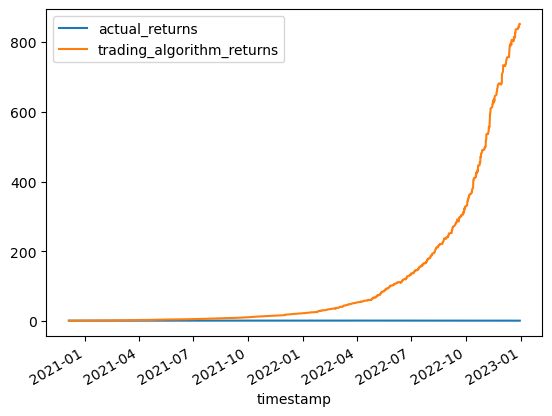

In [16]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = svm_pred

predictions_df["actual_returns"] = df["close"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
predictions_df.head()

# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()